### Loading Dataset

In [20]:
import pandas as pd

df = pd.read_csv('Salary_Data.csv', sep=',')

# Reset index dan tambahkan 1 untuk membuat index dimulai dari 1
df = df.reset_index(drop=True)
df.index = df.index + 1

# Tampilkan beberapa baris pertama DataFrame untuk memastikan data berhasil dimuat
display(df.head())

,Age,Gender,Education Level,Job Title,Years of Experience,Salary
1,32,Male,Bachelor's,Software Engineer,5.0,90000.0
2,28,Female,Master's,Data Analyst,3.0,65000.0
3,45,Male,PhD,Senior Manager,NaN,150000.0
4,36,Female,Bachelor's,Sales Associate,7.0,60000.0
5,52,Male,Master's,Director,20.0,200000.0


In [21]:
# Mengecek ukuran dataset (jumlah baris dan kolom)
print("Ukuran Dataset (baris; kolom) : ", df.shape)

# Mengecek jumlah total elemen dalam dataset
print("Jumlah total elemen dalam dataset : ", df.size)

Ukuran Dataset (baris; kolom) :  (6707, 6)
Jumlah total elemen dalam dataset :  40242


In [22]:
# Mengecek tipe data dari sebuah variabel
my_variable = "Hello"
print("Tipe data my_variable: ", type(my_variable))

my_number = 123
print("Tipe data my_number: ", type(my_number))

# Mengecek tipe data dari setiap kolom dalam DataFrame
print("\nTipe data dari setiap kolom dalam DataFrame: ")
print(df.dtypes)

Tipe data my_variable:  <class 'str'>
Tipe data my_number:  <class 'int'>

Tipe data dari setiap kolom dalam DataFrame: 
Age                      int64
Gender                  object
Education Level         object
Job Title               object
Years of Experience    float64
Salary                 float64
dtype: object


In [23]:
df.isnull().sum()

Age                    0
Gender                 0
Education Level        1
Job Title              1
Years of Experience    2
Salary                 4
dtype: int64

In [24]:
# Hitung jumlah baris duplikat
duplicate_row_count = df.duplicated().sum()

# Cetak jumlah baris duplikat
print(f"Jumlah baris duplikat: {duplicate_row_count}")

# Jika ada baris duplikat, tampilkan beberapa baris duplikat pertama
if duplicate_row_count > 0:
    print("\nBeberapa baris duplikat pertama:")
    print(df[df.duplicated(keep=False)].head())

Jumlah baris duplikat: 4913

Beberapa baris duplikat pertama:
     Age  Gender Education Level                     Job Title  \
1     32    Male      Bachelor's             Software Engineer   
2     28  Female        Master's                  Data Analyst   
141   28    Male      Bachelor's       Junior Business Analyst   
195   28    Male      Bachelor's       Junior Business Analyst   
209   30  Female      Bachelor's  Junior Marketing Coordinator   

     Years of Experience   Salary  
1                    5.0  90000.0  
2                    3.0  65000.0  
141                  2.0  40000.0  
195                  2.0  40000.0  
209                  2.0  40000.0  


### Statistik Data

In [25]:
numerical_df = df.select_dtypes(include=['int64', 'float64'])

# Hitung statistik deskriptif, median, modus, simpangan rata-rata, range dan variansi
descriptive_stats = numerical_df.describe()
median_values = numerical_df.median()
mode_values = numerical_df.mode().iloc[0]
mad_values = numerical_df.apply(lambda x:(x-x.mean()).abs().mean())
range_values = numerical_df.max() - numerical_df.min()
variance_values = numerical_df.var()

descriptive_stats['Median'] = median_values
descriptive_stats['Mode'] = mode_values
descriptive_stats['MAD'] = mad_values
descriptive_stats['Range'] = range_values
descriptive_stats['Variance'] = variance_values

print("Ringkasan Statistik Deskriptif: ")
display(descriptive_stats)

Ringkasan Statistik Deskriptif: 


,Age,Years of Experience,Salary,Median,Mode,MAD,Range,Variance
count,6707.000000,6705.000000,6703.000000,NaN,NaN,NaN,NaN,NaN
mean,33.623677,8.096346,115446.119200,NaN,NaN,NaN,NaN,NaN
std,7.621529,6.067248,53881.790154,NaN,NaN,NaN,NaN,NaN
min,21.000000,0.000000,350.000000,NaN,NaN,NaN,NaN,NaN
25%,28.000000,3.000000,70000.000000,NaN,NaN,NaN,NaN,NaN
50%,32.000000,7.000000,115000.000000,NaN,NaN,NaN,NaN,NaN
75%,38.000000,12.000000,160000.000000,NaN,NaN,NaN,NaN,NaN
max,62.000000,35.000000,1000000.000000,NaN,NaN,NaN,NaN,NaN


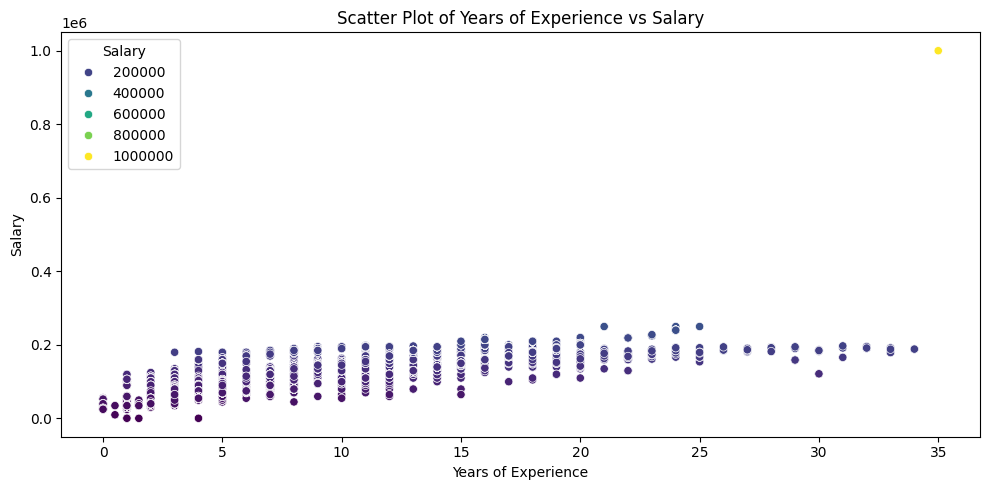

In [26]:
import matplotlib.pyplot as plt
import seaborn as sns

# Contoh Visualisasi hubungan antar dua kolom numerik (Scatter Plot)
# Kita bisa memilih kolom yang relevan, misalnya CGPA vs Academic Presure, diwarnai berdasarkan 'Depression'
numerical_cols_scatter = ['Years of Experience', 'Salary']
plt.figure(figsize=(10, 5))
sns.scatterplot(data=df, x=numerical_cols_scatter[0], y=numerical_cols_scatter[1], hue='Salary', palette='viridis')
plt.title(f'Scatter Plot of {numerical_cols_scatter[0]} vs {numerical_cols_scatter[1]}')
plt.xlabel(numerical_cols_scatter[0])
plt.ylabel(numerical_cols_scatter[1])
plt.tight_layout()
plt.show()

### Cleaning Data

In [28]:
# Tampilkan 5 baris pertama dari DataFrame
print("Lima baris pertama dari DataFrame: ")
display(df.head())

# Cetak informasi ringkasan tentang DataFrame
print("\nInformasi tentang DataFrame:")
df.info()

# Hitung dan tampilkan jumlah nilai yang hilang disetiap kolom
print("\nJumlah nilai yang hilang disetiap kolom:")
df.isnull().sum()

Lima baris pertama dari DataFrame: 


,Age,Gender,Education Level,Job Title,Years of Experience,Salary
1,32,Male,Bachelor's,Software Engineer,5.0,90000.0
2,28,Female,Master's,Data Analyst,3.0,65000.0
3,45,Male,PhD,Senior Manager,NaN,150000.0
4,36,Female,Bachelor's,Sales Associate,7.0,60000.0
5,52,Male,Master's,Director,20.0,200000.0



Informasi tentang DataFrame:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6707 entries, 1 to 6707
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Age                  6707 non-null   int64  
 1   Gender               6707 non-null   object 
 2   Education Level      6706 non-null   object 
 3   Job Title            6706 non-null   object 
 4   Years of Experience  6705 non-null   float64
 5   Salary               6703 non-null   float64
dtypes: float64(2), int64(1), object(3)
memory usage: 314.5+ KB

Jumlah nilai yang hilang disetiap kolom:


Age                    0
Gender                 0
Education Level        1
Job Title              1
Years of Experience    2
Salary                 4
dtype: int64

In [32]:
# Kolom Education Level
Education_mode = df['Education Level'].mode()[0]
print(f"Nilai modus untuk kolom 'Education Level': {Education_mode}")

# Kolom Job Title
Job_mode = df['Job Title'].mode()[0]
print(f"Nilai modus untuk kolom 'Job Title': {Job_mode}")

# Kolom Years of Experience
Experience_mode = df['Years of Experience'].mode()[0]
print(f"Nilai modus untuk kolom 'Years of Experience': {Experience_mode}")

# Kolom Salary
Salary_mode = df['Salary'].mode()[0]
print(f"Nilai modus untuk kolom 'Salary' : {Salary_mode}")

Nilai modus untuk kolom 'Education Level': Bachelor's Degree
Nilai modus untuk kolom 'Job Title': Software Engineer
Nilai modus untuk kolom 'Years of Experience': 2.0
Nilai modus untuk kolom 'Salary' : 140000.0


In [34]:
# Mengisi nilai yang hilang pada kolom dengan modus
df['Education Level'] = df['Education Level'].fillna(Education_mode)
df['Job Title'] = df['Job Title'].fillna(Job_mode)
df['Years of Experience'] = df['Years of Experience'].fillna(Experience_mode)
df['Salary'] = df['Salary'].fillna(Salary_mode)

# Verifikasi bahwa tidak ada nilai yang hilang pada kolom
missing_values_after_fill = df[['Education Level', 'Job Title', 'Years of Experience', 'Salary']].isnull().sum()
print(missing_values_after_fill)

Education Level        0
Job Title              0
Years of Experience    0
Salary                 0
dtype: int64


In [35]:
# Hitung jumlah baris duplikat
duplicate_rows_count = df.duplicated().sum()

# Cetak jumlah baris duplikat
print(f"\nJumlah baris duplikat: {duplicate_rows_count}")

# Jika ada baris duplikat, hapus baris duplikat tersebut
if duplicate_rows_count > 0:
    print("\nMenghapus baris duplikat...")
    df = df.drop_duplicates()
    print("Baris duplikat telah dihapus.")

# Verifikasi bahwa tidak ada baris duplikat lagi
duplicate_rows_count_after = df.duplicated().sum()
print(f"\nJumlah baris duplikat setelah penghapusan: {duplicate_rows_count_after}")

# Tampilkan beberapa baris pertama dari DataFrame yang telah dibersihkan
if duplicate_rows_count > 0:
    print("\nBeberapa baris pertama dari DataFrame setelah pembersihan:")
    display(df.head())


Jumlah baris duplikat: 4913

Menghapus baris duplikat...
Baris duplikat telah dihapus.

Jumlah baris duplikat setelah penghapusan: 0

Beberapa baris pertama dari DataFrame setelah pembersihan:


,Age,Gender,Education Level,Job Title,Years of Experience,Salary
1,32,Male,Bachelor's,Software Engineer,5.0,90000.0
2,28,Female,Master's,Data Analyst,3.0,65000.0
3,45,Male,PhD,Senior Manager,2.0,150000.0
4,36,Female,Bachelor's,Sales Associate,7.0,60000.0
5,52,Male,Master's,Director,20.0,200000.0


In [36]:
# Indenifikasi kolom kategorikal
categorical_cols = df.select_dtypes(include=['object']).columns

print("Memeriksa nilai unik dan distribusi untuk kolom kategorikal:")
for col in categorical_cols:
    print(f"\nKolom: {col}")
    print(df[col].value_counts())

# Identifikasi kolom numerik
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns

print("\nMemeriksa statistik deskriptif untuk kolom numerik:")
display(df[numerical_cols].describe())

Memeriksa nilai unik dan distribusi untuk kolom kategorikal:

Kolom: Gender
Gender
Male      971
Female    816
Other       7
Name: count, dtype: int64

Kolom: Education Level
Education Level
Bachelor's Degree    509
Master's Degree      447
PhD                  342
Bachelor's           263
Master's             122
High School          110
phD                    1
Name: count, dtype: int64

Kolom: Job Title
Job Title
Software Engineer Manager    127
Full Stack Engineer          123
Senior Software Engineer      96
Senior Project Engineer       95
Back end Developer            81
                            ... 
Developer                      1
Social M                       1
Social Media Man               1
Delivery Driver                1
Intern                         1
Name: count, Length: 194, dtype: int64

Memeriksa statistik deskriptif untuk kolom numerik:


,Age,Years of Experience,Salary
count,1794.000000,1794.000000,1794.000000
mean,35.140468,9.154125,113726.860089
std,8.232829,6.866614,55647.459021
min,21.000000,0.000000,350.000000
25%,29.000000,3.000000,70000.000000
50%,33.000000,8.000000,110353.500000
75%,41.000000,13.000000,160000.000000
max,62.000000,35.000000,1000000.000000


In [39]:
# Standarisasi kolom 'Education Level'
df['Education Level'] = df['Education Level'].str.lower().str.strip()

# Gabungkan kategori yang sama
df['Education Level'] = df['Education Level'].replace({
    "bachelor's degree": "bachelor's",
    "master's degree": "master's",
    "phd": "phd",
    "high school": "high school"
})

# Standarisasi kolom 'Job Title'
df['Job Title'] = df['Job Title'].str.lower().str.strip()

# Verifikasi setelah standarisasi
print("\nStandarisasi Kolom setelah standarisasi:")
print(df['Education Level'].value_counts())
print(df['Job Title'].value_counts())


Standarisasi Kolom setelah standarisasi:
Education Level
bachelor's     772
master's       569
phd            343
high school    110
Name: count, dtype: int64
Job Title
software engineer manager    127
full stack engineer          123
senior software engineer      96
senior project engineer       95
back end developer            81
                            ... 
developer                      1
social m                       1
social media man               1
delivery driver                1
intern                         1
Name: count, Length: 193, dtype: int64


C:\Users\LENOVO\AppData\Local\Temp\ipykernel_9540\3350567455.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Education Level'] = df['Education Level'].str.lower().str.strip()
C:\Users\LENOVO\AppData\Local\Temp\ipykernel_9540\3350567455.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Education Level'] = df['Education Level'].replace({
C:\Users\LENOVO\AppData\Local\Temp\ipykernel_9540\3350567455.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
